<a href="https://colab.research.google.com/github/GEJ1/Taller_Python_PsiCodea/blob/main/PsiCodea_d%C3%ADa_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Listita de cosas para hacer:
*   Limpiar datos para que no haya tantas columnas
*   Armar ejemplitos de cosas con un toy data
*   Agregar descripción del experimento (podemos meter el link y hacer la prueba en vivo)
*   Explicar un poco más de las librerías?
*   Agregar links a documentación de las librerías




# Importando las librerías

* Importar una librería es como ir a buscar la caja de herramientas y ponerla sobre una mesa de trabajo lista para que su contenido sea utilizado.

* Las librerías (del inglés *library* que significa biblioteca pero nadie les dice así) son bloques de código que están agrupados para cumplir una función o conjunto de funciones.

* En este caso vamos a hacer uso de las siguientes:
  * **Numpy**: Librería para álgebra lineal. Nos permitirá, entre otras cosas, utilizar arreglos (*arrays*) y por lo tanto potenciar nuetras capacidades matemáticas. 
  * **Pandas** : Para trabajar con *data frames*, un tipo de dato similar a una tabla de excel.
  * **matplotlib**: Para realizar gráficos y visualizaciones en general.
  * **scipy** : Para análisis estadístico.

In [ ]:
# Sintaxis para importar librerias, el "as" es una manera de definirla con un nombre mas sencillo, pero no es obligatorio.
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

In [ ]:
# @title Video para musicalizar el aprendizaje y mostrar que en Google Colab se puede insertar prácticamente cualquier tipo de contenido. Dale doble click a esta celda para ver el código.

from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/D2yymMhjRu8" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

# Manos a la data!

Vamos a trabajar con los datos de un experimento online muy sencillo que involucra percepción y tiempos de reaccción.

* La tarea consistía en presionar la tecla j si aparecía en la pantalla un círculo naranja y la tecla f si aparecía un círculo azul. Los estímulos aparecían solo durante una fracción de segundo.

<center>
<img width="500" height="auto" src="https://miro.medium.com/max/729/1*KBXJ2QKaHUgrxLZaHxuksA.png"> 
<p>Fuente: https://www.jspsych.org/tutorials/rt-task/</p>
</center>

* Los datos que van a estar ordenados de la siguiente manera:
  * Cada fila corresponde a la presentación de un círculo
  * Tendremos las columnas: 


# Montamos nuestro drive en Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Cargamos nuestro archivo
### Podes descargarlo de Github desde [acá](https://github.com/GEJ1/Tutoriales_jsPsych/blob/master/go-no-go.csv)

### O si no están muy familiarizados con git pueden bajar el .zip desde [acá](https://minhaskamal.github.io/DownGit/#/home?url=https:%2F%2Fgithub.com%2FGEJ1%2FTutoriales_jsPsych%2Fblob%2Fmaster%2Fgo-no-go.csv), pero no se olviden de descompromirlo porque lo necesitamos en formato .csv

In [ ]:
# Creamos nuestro DataFrame con los datos de nuestro experimento
# Esta es la salida del experimento de go no go, tal cual como sale de la página donde tenemos subido el experimento.
df = pd.read_csv('/content/drive/MyDrive/datos_de_mi_experimento/go-no-go.csv')

In [ ]:
# Dimensiones descriptas en formato (filas, columnas)
df.shape

(24, 21)

In [ ]:
#Miramos los primeros 5 valores
df

,run_id,condition,rt,stimulus,key_press,trial_type,trial_index,time_elapsed,internal_node_id,success,test_part,correct_response,correct,recorded_at,ip,user_agent,device,browser,browser_version,platform,platform_version
0,38,1,2033.0200000025798,Welcome to the experiment. Press any key to be...,32,html-keyboard-response,0,2087,0.0-0.0,"""","""","""","""",2020-09-21 03:38:08,181.164.53.97,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,WebKit,Chrome,85.0.4183.102,Windows,10.0
1,38,1,"""","""","""",fullscreen,1,4559,0.0-1.0,true,"""","""","""",2020-09-21 03:38:08,181.164.53.97,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,WebKit,Chrome,85.0.4183.102,Windows,10.0
2,38,1,13162.125000002561,"<p>In this experiment, a circle will appear in...",32,html-keyboard-response,2,17722,0.0-2.0,"""","""","""","""",2020-09-21 03:38:08,181.164.53.97,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,WebKit,Chrome,85.0.4183.102,Windows,10.0
3,38,1,NaN,"<div style=""font-size:60px;"">+</div>",NaN,html-keyboard-response,3,20227,0.0-3.0-0.0,"""",fixation,"""","""",2020-09-21 03:38:08,181.164.53.97,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,WebKit,Chrome,85.0.4183.102,Windows,10.0
4,38,1,466.5249999961816,img/orange.png,74,image-keyboard-response,4,20695,0.0-3.0-1.0,"""",test,j,true,2020-09-21 03:38:08,181.164.53.97,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,WebKit,Chrome,85.0.4183.102,Windows,10.0
5,38,1,NaN,"<div style=""font-size:60px;"">+</div>",NaN,html-keyboard-response,5,22448,0.0-3.0-0.1,"""",fixation,"""","""",2020-09-21 03:38:08,181.164.53.97,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,WebKit,Chrome,85.0.4183.102,Windows,10.0
6,38,1,464.14999999979045,img/blue.png,70,image-keyboard-response,6,22913,0.0-3.0-1.1,"""",test,f,true,2020-09-21 03:38:08,181.164.53.97,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,WebKit,Chrome,85.0.4183.102,Windows,10.0
7,38,1,NaN,"<div style=""font-size:60px;"">+</div>",NaN,html-keyboard-response,7,23914,0.0-3.0-0.2,"""",fixation,"""","""",2020-09-21 03:38:08,181.164.53.97,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,WebKit,Chrome,85.0.4183.102,Windows,10.0
8,38,1,617.9200000042329,img/blue.png,70,image-keyboard-response,8,24535,0.0-3.0-1.2,"""",test,f,true,2020-09-21 03:38:08,181.164.53.97,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,WebKit,Chrome,85.0.4183.102,Windows,10.0
9,38,1,NaN,"<div style=""font-size:60px;"">+</div>",NaN,html-keyboard-response,9,26286,0.0-3.0-0.3,"""",fixation,"""","""",2020-09-21 03:38:08,181.164.53.97,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,WebKit,Chrome,85.0.4183.102,Windows,10.0


In [ ]:
#Comando para estadísticas basicas
df.describe()

,run_id,condition,trial_index,time_elapsed,platform_version
count,24.0,24.0,24.000000,24.000000,24.0
mean,38.0,1.0,11.500000,25968.416667,10.0
std,0.0,0.0,7.071068,8578.981114,0.0
min,38.0,1.0,0.000000,2087.000000,10.0
25%,38.0,1.0,5.750000,22796.750000,10.0
50%,38.0,1.0,11.500000,28205.000000,10.0
75%,38.0,1.0,17.250000,31630.000000,10.0
max,38.0,1.0,23.000000,35553.000000,10.0


In [ ]:
# Chequeamos el tipo de las columnas

print(df['run_id'].dtypes)
print(df['condition'].dtypes)
print(df['trial_index'].dtypes)
print(df['time_elapsed'].dtypes)
print(df['platform_version'].dtypes)  

int64
int64
int64
int64
float64


In [ ]:
# Eliminamos las primeras 3 filas que no tienen datos que nos sirvan para este analisis
df.drop([0, 1, 2], inplace=True )

In [ ]:
# Filtro los tiempos de respuesta para estímulos naranjas
df['rt_naranjas'] = df[df['stimulus'].str.contains("orange")]['rt']

In [ ]:
# Filtro los tiempos de respuesta para estímulos azules
df['rt_azules'] = df[df['stimulus'].str.contains("blue")]['rt']

In [ ]:
# ¿Por qué no observamos los tiempos de respuesta en las estadísticas? 
# ¿ Qué tipo de datos contiene la columna "rt" ?
df['rt_naranjas'].dtype

dtype('O')

In [ ]:
# Preparo los naranjas y azules para utilizarlos eliminando los NaN y
# asegurándome que sean los valores sean tipo numérico.
naranjas = df['rt_naranjas'].dropna().astype(float)
azules = df['rt_azules'].dropna().astype(float)


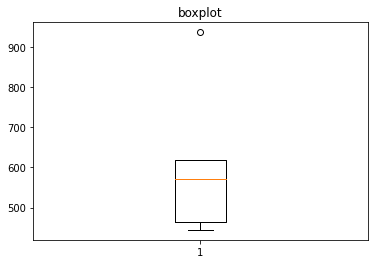

In [ ]:
# Plor para los azules
fig2, ax2 = plt.subplots()
ax2.set_title('boxplot')
ax2.boxplot(azules)

plt.show()

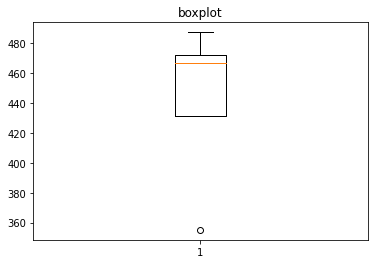

In [ ]:
fig2, ax2 = plt.subplots()
ax2.set_title('boxplot')
ax2.boxplot(naranjas)

plt.show()

In [ ]:
azules

6     464.150
8     617.920
14    444.515
16    936.490
22    572.165
Name: rt_azules, dtype: float64

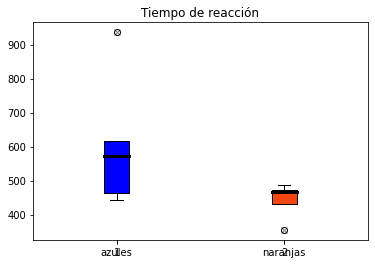

In [ ]:
data = [azules,naranjas]
fig1, ax = plt.subplots()
ax.set_title('Tiempo de reacción')
ax.boxplot(data)

# etiqueta eje x 
ax.set_xticklabels(['azules', 'naranjas'])

# Estilo y colores de las cajas
bp = ax.boxplot(data, patch_artist = True) 
colors = ['#0000FF',  '#f44611'] 
  
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color) 

# Estilos de los puntos 
for flier in bp['fliers']: 
    flier.set(marker ='x', 
              color ='#e7298a', 
              alpha = 0.5) 
    
# Color y grosor de las líneas que marcan las medianas 
for median in bp['medians']: 
    median.set(color ='black', 
               linewidth = 3) 
# Mostrar el gráfico
plt.show()

In [ ]:
# Hacemos un  t-test de naranjas vs. azules

stats.ttest_ind(naranjas,azules)


Ttest_indResult(statistic=-1.7964682563327923, pvalue=0.1101458715478464)